<a href="https://colab.research.google.com/github/leonroars/datastudy_BrianTony/blob/main/Titanic_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing basic libararies

In [22]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

## Loading Titanic Dataset

In [3]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

## Basic EDA

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   float64 
 1   name      1309 non-null   object  
 2   sex       1309 non-null   category
 3   age       1046 non-null   float64 
 4   sibsp     1309 non-null   float64 
 5   parch     1309 non-null   float64 
 6   ticket    1309 non-null   object  
 7   fare      1308 non-null   float64 
 8   cabin     295 non-null    object  
 9   embarked  1307 non-null   category
dtypes: category(2), float64(5), object(3)
memory usage: 84.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'embarked')

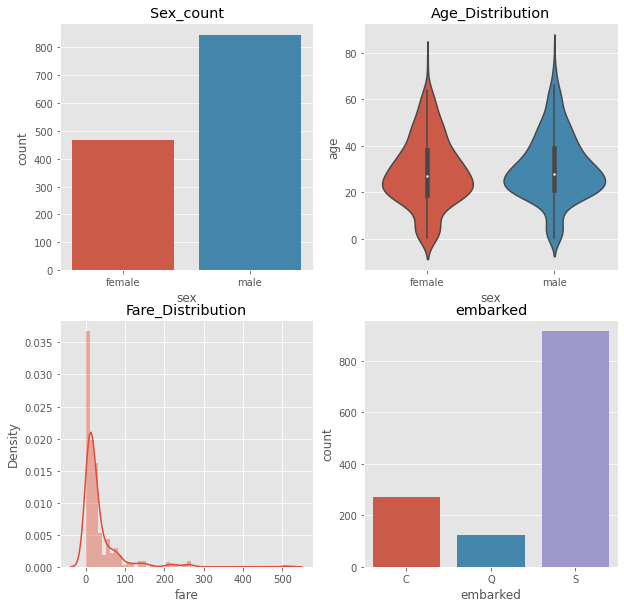

In [23]:
fig, ax= plt.subplots(2,2,figsize=(10,10))
ax1=sns.countplot(X['sex'],ax=ax[0,0])
ax1.set_title('Sex_count')
ax2=sns.violinplot(data=X,x='sex',y='age',ax=ax[0,1])
ax2.set_title('Age_Distribution')
ax3=sns.distplot(X['fare'],ax=ax[1,0])
ax3.set_title('Fare_Distribution')
ax4=sns.countplot(X['embarked'],ax=ax[1,1])
ax4.set_title('embarked')

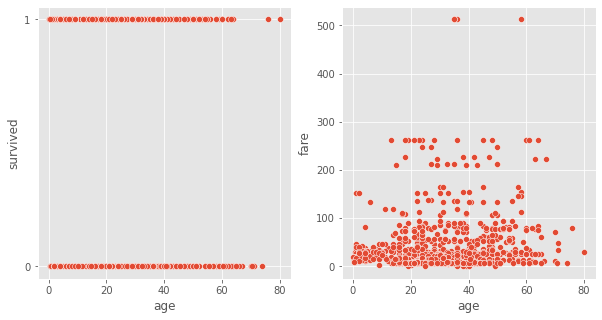

In [35]:
total_df=X.merge(y,left_index=True,right_index=True)

fig,ax=plt.subplots(1,2,figsize=(10,5))
ax1=sns.scatterplot(data=total_df,x='age',y='survived',ax=ax[0])
ax1.invert_yaxis()
ax2=sns.scatterplot(data=total_df,x='age',y='fare',ax=ax[1])